<a href="https://colab.research.google.com/github/Asmi8/8-queen-Problem/blob/main/Parkinson_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : This program detects if an individual has Parkinson's disease

In [13]:
# Get the dependencies
import numpy as np
import pandas as pd
import os,sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns



In [1]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Parkinsson disease.csv to Parkinsson disease.csv


In [14]:
#Load the data into data frame
df = pd.read_csv('Parkinsson disease.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [15]:
#Check this data for missing values
df.isnull().values.any()

False

In [16]:
#Get the number of rows and columns in the data set
df.shape

(195, 24)

In [19]:
#Get the target count
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [20]:
percent_has_disease = 147/(147 + 48)*100
percent_dont_have_disease = 48/(147 + 48)*100
print('If I guess the individual did not have Parkinsons disease, I would be correct',percent_dont_have_disease,'% of the time.')
print('If I guess the individual has Parkinsons disease, I would be correct',percent_has_disease,'% of the time.')

If I guess the individual did not have Parkinsons disease, I would be correct 24.615384615384617 % of the time.
If I guess the individual has Parkinsons disease, I would be correct 75.38461538461539 % of the time.


<Axes: ylabel='count'>

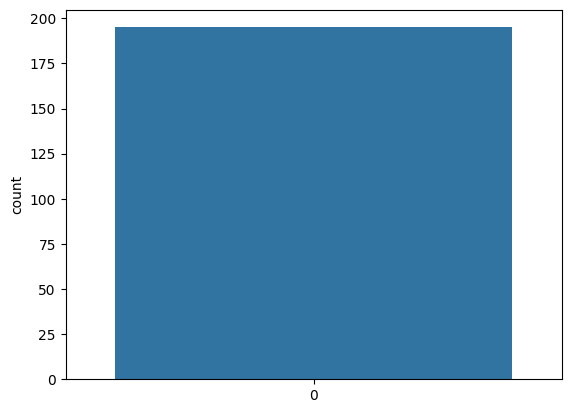

In [21]:
#Visualize the count
sns.countplot(df['status'])

In [ ]:
#Get the data types
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
# Create the feature data set
X = df.drop(['name'], 1)
X = np.array(X.drop(['status'], 1))
# Create the target data set
y = np.array(df['status'])

<ipython-input-18-203abd85edb3>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(['name'], 1)
<ipython-input-18-203abd85edb3>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(X.drop(['status'], 1))


In [ ]:
# Split the data into 80% training and 20% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Transform the feature data to be values between 0 and 1
scale = MinMaxScaler(feature_range=(0,1))
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
#Create the XGBClassifier
model = XGBClassifier().fit(x_train, y_train)

In [ ]:
#Get the models predictions
predictions = model.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
#Get the models accuracy, precision, recall and the f1-score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.91      0.97      0.94        30

    accuracy                           0.90        39
   macro avg       0.88      0.82      0.84        39
weighted avg       0.89      0.90      0.89        39

